# LUMPREM 

In [1]:
import lumpyrem as lr
import os

In [2]:
# set the workspace directory
workspace = os.path.join('.','workspace')

# initiate the model and write the in files
b = lr.lumprem.Model(model_name='def', workspace=workspace)
b.write_model()

# run themodel
b.run_model()

LUMPREM model input file written to: 
.\workspace\lr_def.in
PEST template file written to: 
.\workspace\lr_def.tpl

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_def.in read ok.
 - file lr_def.out written ok.



In [3]:
# get model results
results = b.get_results()
results.head()

,days,volume,vol_drain,vol_macro,delta_vol,del_vol_drain,del_vol_macro,rainfall,irrigation,recharge,...,workspace,maxvol_br,extravol_br,gamma_br,ks_br,m_br,l_br,vol_br,epotfile_br,epot_br_all
0,0,0.250000,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.248301,0.001249,0.0,-0.001699,0.001249,0.0,0.0000,0.0,0.0,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.246668,0.002458,0.0,-0.001633,0.001209,0.0,0.0000,0.0,0.0,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.245272,0.003632,0.0,-0.001395,0.001174,0.0,0.0002,0.0,0.0,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.243889,0.004774,0.0,-0.001383,0.001142,0.0,0.0002,0.0,0.0,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# write an irrigation file using number of days, day on which irrigation starts, and fraction of the year with irrigation
b.write_irigfile(numdays=3650, irrig_start=150, fracyear=0.3) 

# take a look at the file
def printfile(filename):
    print('\nFile: '+os.path.basename(filename))
    f = open(filename,'r')
    print(f.read())
    f.close()
    return

filename = os.path.join(workspace,'irrig.in')
printfile(filename)

Irrigation input file written to: 
.\workspace\irrig.in

File: irrig.in
1 0 0.0
150 1 0.5
259 0 0.0
515 1 0.5
624 0 0.0
880 1 0.5
989 0 0.0
1245 1 0.5
1354 0 0.0
1611 1 0.5
1720 0 0.0
1976 1 0.5
2085 0 0.0
2341 1 0.5
2450 0 0.0
2706 1 0.5
2815 0 0.0
3072 1 0.5
3181 0 0.0
3437 1 0.5
3546 0 0.0



In [5]:
# write an irrigation file for a specified start date and fraction of year with irrigation
b.write_irigfile(numdays=3650,fracyear=0.3, date_start='01/01/2010', irrig_start='01/05/2010', irrigfile='irrig_dates1.in')

filename = os.path.join(workspace,'irrig_dates1.in')
printfile(filename)

Irrigation input file written to: 
.\workspace\irrig_dates1.in

File: irrig_dates1.in
1 0 0.0
120 1 0.5
229 0 0.0
485 1 0.5
594 0 0.0
851 1 0.5
960 0 0.0
1216 1 0.5
1325 0 0.0
1581 1 0.5
1690 0 0.0
1946 1 0.5
2055 0 0.0
2312 1 0.5
2421 0 0.0
2677 1 0.5
2786 0 0.0
3042 1 0.5
3151 0 0.0
3407 1 0.5
3516 0 0.0



In [6]:
# write an irrigation file for a specified start date and days for irrigation to start and end
b.write_irigfile(numdays=3650, date_start='01/01/2010', irrig_start='01/05/2010', irrig_end='01/10/2010', irrigfile='irrig_dates2.in')

filename = os.path.join(workspace,'irrig_dates2.in')
printfile(filename)

Irrigation input file written to: 
.\workspace\irrig_dates2.in

File: irrig_dates2.in
1 0 0.0
120 1 0.5
273 0 0.0
485 1 0.5
638 0 0.0
851 1 0.5
1004 0 0.0
1216 1 0.5
1369 0 0.0
1581 1 0.5
1734 0 0.0
1946 1 0.5
2099 0 0.0
2312 1 0.5
2465 0 0.0
2677 1 0.5
2830 0 0.0
3042 1 0.5
3195 0 0.0
3407 1 0.5
3560 0 0.0



In [7]:
# write an irrigation file for a specified start and end date, as well as start and end days for irrigation
b.write_irigfile(date_start='01/01/2010', date_end='01/01/2020', irrig_start='01/05/2010', irrig_end='01/10/2010', irrigfile='irrig_dates3.in')

filename = os.path.join(workspace,'irrig_dates3.in')
printfile(filename)

Irrigation input file written to: 
.\workspace\irrig_dates3.in

File: irrig_dates3.in
1 0 0.0
120 1 0.5
273 0 0.0
485 1 0.5
638 0 0.0
851 1 0.5
1004 0 0.0
1216 1 0.5
1369 0 0.0
1581 1 0.5
1734 0 0.0
1946 1 0.5
2099 0 0.0
2312 1 0.5
2465 0 0.0
2677 1 0.5
2830 0 0.0
3042 1 0.5
3195 0 0.0
3407 1 0.5
3560 0 0.0



LUMPREM model input file written to: 
.\workspace\lr_ghj.in
PEST template file written to: 
.\workspace\lr_ghj.tpl

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_ghj.in read ok.
 - file lr_ghj.out written ok.



<AxesSubplot:xlabel='days'>

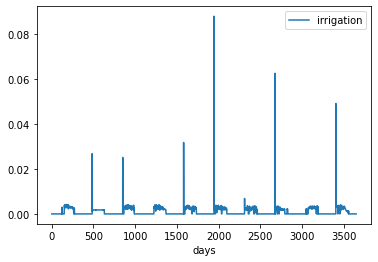

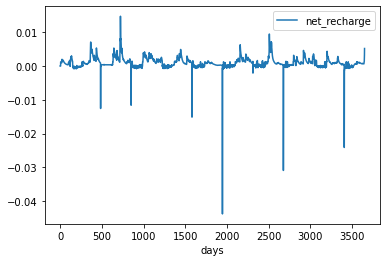

In [8]:
# make a model with an irrig in file
c = lr.lumprem.Model('ghj', workspace=workspace)
c.irrigfile = 'irrig_dates3.in'

c.write_model(numdays=3650)
c.run_model()
results = c.get_results()
results.plot('days','irrigation')
results.plot('days', 'net_recharge')

In [9]:
# see the names of columns in the LUMPREM output file
results.columns

Index(['days', 'volume', 'vol_drain', 'vol_macro', 'delta_vol',
       'del_vol_drain', 'del_vol_macro', 'rainfall', 'irrigation', 'recharge',
       'macro_rech', 'total_rech', 'gw_withdrawal', 'net_recharge', 'runoff',
       'pot_evap', 'evaporation', 'gw_pot_evap', 'balance', 'elevation',
       'depth-to-water', 'lumprem_model_name', 'rainfile', 'epotfile',
       'vegfile', 'irrigfile', 'maxvol', 'irrigvolfrac', 'rdelay', 'mdelay',
       'ks', 'M', 'L', 'mflowmax', 'offset', 'factor1', 'factor2', 'power',
       'elevmin', 'elevmax', 'surface', 'vol', 'workspace', 'maxvol_br',
       'extravol_br', 'gamma_br', 'ks_br', 'm_br', 'l_br', 'vol_br',
       'epotfile_br', 'epot_br_all'],
      dtype='object')

## Creating head timeseries

LUMPREM model input file written to: 
.\workspace\lr_ghb.in
PEST template file written to: 
.\workspace\lr_ghb.tpl

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_ghb.in read ok.
 - file lr_ghb.out written ok.



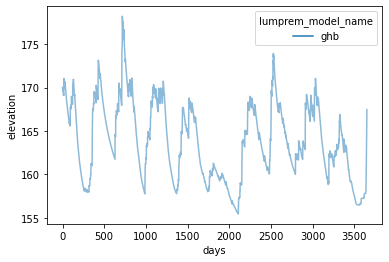

In [10]:
# create a lumprem model and apply an offset, factor1, factor2 and power

ghb = lr.lumprem.Model('ghb', workspace=workspace,factor1=30,
                                                    factor2=20,
                                                    power=2,
                                                    offset=150.0,
                                                    maxvol=1,
                                                    surface=200,
                                                    ks=0.1,
                                                    irrigvolfrac=0.0,
                                                    vegfile=(0.8,1.0), irrigfile = (0, 0.0))
ghb.write_model(numdays=3650)
ghb.run_model()
df=ghb.get_results()


# plot the model results
import seaborn as sb
sb.lineplot(data=df, x='days',y='elevation', hue='lumprem_model_name', alpha=0.5);

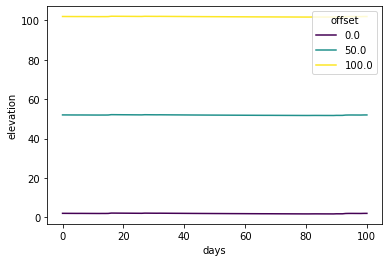

In [11]:
# effect of offset

import pandas as pd 
results = pd.DataFrame()

for offset in [0., 50., 100.]:
    ele = lr.lumprem.Model('ele', workspace=workspace,offset=offset)
    ele.write_model(print_output=False)
    ele.run_model(print_output=False)
    df = ele.get_results()
    results = pd.concat([results, df])

sb.lineplot(data=results, x='days',y='elevation', hue='offset', palette='viridis');

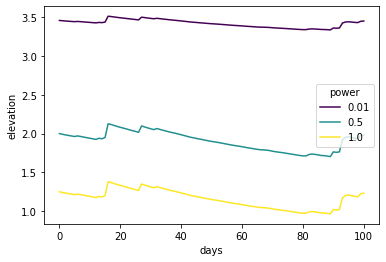

In [12]:
# influence of 'power'

results = pd.DataFrame()
for power in [0.01, 0.5, 1.0]:
    ele = lr.lumprem.Model('ele', workspace=workspace,power=power)
    ele.write_model(print_output=False)
    ele.run_model(print_output=False)
    df = ele.get_results()
    results = pd.concat([results, df])

sb.lineplot(data=results, x='days',y='elevation', hue='power', palette='viridis');

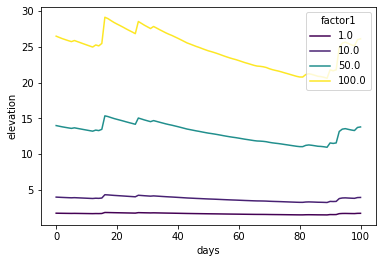

In [13]:
# influence of factor1
results = pd.DataFrame()
for factor1 in [1, 10.,50.,100.]:
    ele = lr.lumprem.Model('ele', workspace=workspace,factor1=factor1)
    ele.write_model(print_output=False)
    ele.run_model(print_output=False)
    df = ele.get_results()
    results = pd.concat([results, df])
sb.lineplot(data=results, x='days',y='elevation', hue='factor1', palette='viridis');


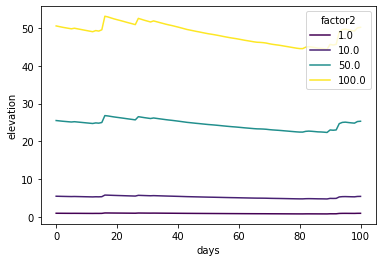

In [14]:
# influence of factor2
results = pd.DataFrame()
for factor2 in [1, 10.,50.,100.]:
    ele = lr.lumprem.Model('ele', workspace=workspace,factor2=factor2)
    ele.write_model(print_output=False)
    ele.run_model(print_output=False)
    df = ele.get_results()
    results = pd.concat([results, df])
sb.lineplot(data=results, x='days',y='elevation', hue='factor2', palette='viridis');

# Using LR2SERIES
## Generates MODFLOW6 timeseries file from several LUMPREM model outputs

In [15]:
# make a mf6 tseries file

# run some LUMPREM models. These have to have the same time configuration.
# make a list of the lumprem models
model_names = ['abc','def','ghi']
lr_models =[]

for name in model_names:
    model = lr.lumprem.Model(model_name=name, workspace=workspace, vegfile=(0.5,1.0))
    lr_models.append(model)

    model.write_model(numdays=3650, noutdays='monthly', start_date='01/01/2010', end_date='01/01/2020') #note that numdays is ignored in favour of start/enddate and
    model.run_model()


# make a list of lumprem output columns to read
lumprem_output_cols = ['net_recharge','gw_withdrawal']

# make a list of timseries names for the column to be used in the ts file. Length and sequence of ts_names and lumprem columns must match!
ts_names = ['rech','pumping']

# make a list of methods for the timeseries
methods = ['linearend','linear']

#initialize the timeseries object
rechts = lr.lr2series.TimeSeries('rch.ts',workspace=workspace, lr_models=lr_models, lumprem_output_cols=lumprem_output_cols, ts_names=ts_names, methods=methods)

# write lr2series input and ts file
rechts.write_ts()

LUMPREM model input file written to: 
.\workspace\lr_abc.in
PEST template file written to: 
.\workspace\lr_abc.tpl

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_abc.in read ok.
 - file lr_abc.out written ok.

LUMPREM model input file written to: 
.\workspace\lr_def.in
PEST template file written to: 
.\workspace\lr_def.tpl

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_def.in read ok.
 - file lr_def.out written ok.

LUMPREM model input file written to: 
.\workspace\lr_ghi.in
PEST template file written to: 
.\workspace\lr_ghi.tpl

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_ghi.in read ok.
 - file lr_ghi.out written ok.

MF6 timeseries file .\workspace\rch.ts.in written to:
.\workspace\rch.ts.in
 Enter name of LR2SERIES control file:  
 - reading file rch.ts.in...
 
 - reading LUMPREM2 output file lr_abc.out...
 - file lr_abc.out read ok.
 
 User-supplied se

In [16]:
# check the output MF6 timeseries file
filename = os.path.join(workspace,'rch.ts')
printfile(filename)


File: rch.ts
BEGIN ATTRIBUTES
   NAMES rech_abc pumping_abc rech_def pumping_def rech_ghi pumping_ghi
   METHODS LINEAREND LINEAR LINEAREND LINEAR LINEAREND LINEAR
END ATTRIBUTES
 
 
BEGIN TIMESERIES
   0.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000    
   1.000000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000    
   31.00000      1.1472113E-03   0.000000      1.1472113E-03   0.000000      1.1472113E-03   0.000000    
   59.00000      1.2279307E-03   0.000000      1.2279307E-03   0.000000      1.2279307E-03   0.000000    
   90.00000      5.2915871E-04   0.000000      5.2915871E-04   0.000000      5.2915871E-04   0.000000    
   120.0000      1.0560290E-03   0.000000      1.0560290E-03   0.000000      1.0560290E-03   0.000000    
   151.0000      2.0209890E-03   0.000000      2.0209890E-03   0.000000      2.0209890E-03   0.000000    
   181.0000      7.2904000E-04   0.000000      7.2904000E

# Using LUMPREP

LUMPREP is included for legacy reasons. It's main contribution is handling files in SILO format as well as generating a PEST control file. It also has limitations such as maximum number of LUMPREM models (30) and not designed to manipulate all model parameters. Lumpyrem substitues (or will) much of this functionality. 

In [17]:
# set lumprep workspace
lp_workspace = os.path.join('.','lumprep_workspace')

# setup LUMPREM model parameters using lumprem model objects. We have already done this in previous steps. 
# Let's just use existing list of models: lr_models
# But let's change some parameters so that we can see diferences between the models

lr_models[0].vegfile = (0.1,1)
lr_models[1].vegfile = (0.5,1)
lr_models[2].vegfile = (0.9,1)

In [18]:

z = lr.lumprep.Simulation(model_list=lr_models,silofile=('silofile.txt', 'evap'),start_date='01/01/2000',end_date='01/01/2010', workspace=lp_workspace)

# check the model names imprted to the lumprep Simulation
z.model_names

['abc', 'def', 'ghi']

In [19]:
# check the lumprep simulation workspace 
z.__dict__['workspace']

'.\\lumprep_workspace'

In [20]:
# write the LUMPREP input file
z.write_simulation()

 Enter name of LUMPREP control file:  
 - reading file lumprep.in...
 
 START_DATE                  = 01/01/2000
 END_DATE                    = 01/01/2010
 NDAY_OUT                    = monthly
 STEPS_PER_DAY               = 1
 SILOFILE                    = silofile.txt
 EVAPCOLSTRING               = "evap"
 - reading file silofile.txt...
 - file silofile.txt read ok
 RAINFILE                    = rain.dat
 - writing file rain.dat...
 - file rain.dat written ok
 EPOTFILE                    = epot.dat
 - writing file epot.dat...
 - file epot.dat written ok
 CROPFAC                     = 0.1000000
 GAMMA                       = 1.000000
 IRRIGCODE                   = 0
 GWIRRIGFRAC                 = 0.000000
 MAXVOL                      = 0.5000000
 IRRIGVOLFRAC                = 0.5000000
 RDELAY                      = 5.000000
 MDELAY                      = 1.000000
 KS                          = 0.1000000
 M                           = 0.5000000
 L                           = 0.5000000

In [21]:
# run all the models prepared by LUMPREP
z.run_simulation()

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_abc.in read ok.
 - file lr_abc.out written ok.

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_def.in read ok.
 - file lr_def.out written ok.

 Enter name of LUMPREM2 control file:  Enter name for LUMPREM2 output file:  
 - file lr_ghi.in read ok.
 - file lr_ghi.out written ok.



In [22]:
# get the Simualtion results in a Pandas DataFrame
results = z.get_results()
results.head()

,days,volume,vol_drain,vol_macro,delta_vol,del_vol_drain,del_vol_macro,rainfall,irrigation,recharge,...,workspace,maxvol_br,extravol_br,gamma_br,ks_br,m_br,l_br,vol_br,epotfile_br,epot_br_all
0,0.0,0.250000,0.000000,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.000000,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31.0,0.270184,0.009790,0.0,0.020183,0.009790,0.0,0.0708,0.0,0.037200,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60.0,0.233714,0.004846,0.0,-0.036469,-0.004944,0.0,0.0068,0.0,0.043968,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91.0,0.227840,0.003559,0.0,-0.005874,-0.001288,0.0,0.0218,0.0,0.024289,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,121.0,0.309692,0.010265,0.0,0.081852,0.006707,0.0,0.1452,0.0,0.051291,...,.\workspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


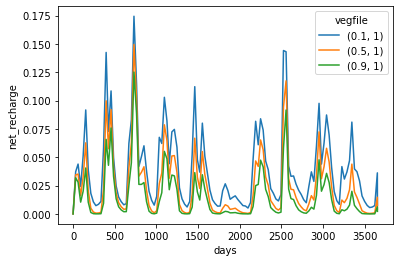

In [23]:
# take a look at the results. Note that the models ar eall the same, with the exceptio of the offset parameter (see lr2series section)
sb.lineplot(data=results, x='days',y='net_recharge', hue='vegfile');